In [2]:
import pandas as pd
import numpy as py
import requests 
import csv
import os
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather

## Downloading image-predictions

In [3]:
## Downloading image-predicitons programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)        

with open('image-predictions.tsv', 'w') as f:
    writer = csv.writer(f)
    for line in response.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))


## Loading Twitter archive and image-predictions

In [4]:
## Loading both files after programmatically downloading image-predictions
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

## Gather Additional info using Twitter api

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)


2356

In [16]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [48]:
##Loading the tweet_json into a dataframe
# Now we are going to create a DataFrame from the tweet_json.txt file:
my_demo_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = []
    for line in open('tweet_json.txt', 'r'):
        all_data.append(json.loads(line))
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count'] 
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_api = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [49]:
df_api.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,35458,7487,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30697,5557,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,23088,3680,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,38743,7664,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37023,8266,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f


# Assess

In [8]:
df_2.tweet_id.duplicated

<bound method Series.duplicated of 0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804

In [9]:
df_2.info

<bound method DataFrame.info of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

In [10]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
df_1[df_1['expanded_urls'].isnull()].loc[:,['expanded_urls', 
                                                                  'in_reply_to_status_id', 
                                                                  'in_reply_to_user_id',
                                                                 'retweeted_status_id']]


,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id
30,NaN,8.862664e+17,2.281182e+09,NaN
55,NaN,8.816070e+17,4.738443e+07,NaN
64,NaN,8.795538e+17,3.105441e+09,NaN
113,NaN,8.707262e+17,1.648776e+07,NaN
148,NaN,8.634256e+17,7.759620e+07,NaN
179,NaN,8.571567e+17,1.806710e+08,NaN
185,NaN,NaN,NaN,8.563302e+17
186,NaN,8.562860e+17,2.792810e+08,NaN
188,NaN,8.558616e+17,1.943518e+08,NaN
189,NaN,8.558585e+17,1.361572e+07,NaN


In [64]:
# Only four of non-url tweets are not replies. 
my_non_url_non_replies_ids = df_1.iloc[[185, 375, 707, 1445],:].tweet_id
df_1.iloc[[185, 375, 707, 1445],:]
# We will check later on if the urls of these tweets can be found in the dataframe created
# from the Twitter API. As we can see from the text column the first one is a retweet 
# (RT@ indicates a retweet):

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [65]:
# As it was relevealed by the info method the dataype of tweet_id should be changed.
df_1['in_reply_to_status_id'].count() / len(df_1)

0.033106960950764007

In [13]:
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [50]:
# As a crosscheck lets see if retweets in the twitter-archive DataFrame are identified as
# retweets in the tweet_json DataFrame:
tw_arch_retw = df_1[df_1['retweeted_status_id'].notnull()]['tweet_id'].tolist()
tweet_json_retw = df_api[df_api['retweeted_status'] == "This is a retweet" ]['tweet_id'].tolist()
df_api['retweeted_status'].value_counts()


Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [51]:
# Checking datatypes of newly created lists:
print(type(tw_arch_retw[0]))
print(type(tweet_json_retw[0]))

<class 'int'>
<class 'str'>


In [52]:
# Converting list of strs to list of ints in order to check for common elements
tweet_json_retw = list(map(int, tweet_json_retw))

In [53]:
# Count the number of common elements
len(list(set(tw_arch_retw).intersection(tweet_json_retw)))

163

In [54]:
len(tw_arch_retw)

181

In [69]:
df_api[df_api['tweet_id'].isin(list(map(str, my_non_url_non_replies_ids)))]

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
177,856330835276025856,0,627,Mon Apr 24 02:15:55 +0000 2017,Twitter for iPhone,This is a retweet,This is a retweet
360,828361771580813312,2162,172,Sun Feb 05 21:56:51 +0000 2017,Twitter Web Client,Original tweet,n
689,785515384317313025,6104,1250,Mon Oct 10 16:20:36 +0000 2016,Twitter for iPhone,Original tweet,y
1421,696518437233913856,3816,1665,Mon Feb 08 02:18:30 +0000 2016,Twitter for iPhone,Original tweet,r


In [70]:
df_2[df_2['tweet_id'].isin(list(map(str, my_non_url_non_replies_ids)))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [71]:
df_api.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7409.462462,2634.182325
std,11508.912580,4454.909012
min,0.000000,1.000000
25%,1287.000000,535.000000
50%,3218.000000,1231.000000
75%,9065.500000,3058.000000
max,152892.000000,75683.000000


## Quality

### twitter_archive table
    - Retweets present in the DataFrame (we only want original tweets with images)
    - Columns relevant to retweets needs to be dropped (we only want original tweets with images). 
         Replies related columns not really needed.   
    - Erroneous datatype for tweet_id
    - Erroneous rating_nominator and rating_denominator values

### image_predictions table
    - Erroneous datatype for tweet_id.
    - Lowercase dog breed names
    - Non-descriptive column names for several variables.

## Tidiness
    

### twitter_archive table
    - Four variables (doggo, floofer, pupper, puppo) should be merged in one column
    - Timestamp should be split into date and time

# Clean

## Define
    - Retweets present in the dataset (we only want original tweets with images)
    - Changing the type of datetime , rating_numerator
    - Dropping unnecessary columns
    - Replacing 'a' and 'an' in the name column with None
    - Change the title of non-descriptive columns to more appropriate ones.

## Code

In [72]:
df_clean_1 = df_1.copy()
df_clean_2 = df_2.copy()
df_clean_api= df_api.copy()

In [73]:
df_clean_1 = df_clean_1[~df_clean_1.tweet_id.isin(tw_arch_retw)]

In [74]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [75]:
# Isolating image prediction ids
image_pred_ids = df_clean_2['tweet_id'].tolist()

In [77]:
# Isolationg original tweet ids
twitter_archive_clean_ids = df_clean_1['tweet_id'].tolist()

In [78]:
# Checking datatypes of newly created lists:
print(type(image_pred_ids[0]))
print(type(twitter_archive_clean_ids[0]))

<class 'int'>
<class 'int'>


In [79]:
# Count the number of common elements between the two lists:
print(len(list(set(image_pred_ids).intersection(twitter_archive_clean_ids))))

1994


In [80]:
# So there are 1994 original tweets that have image predictions.
# Saving the list of those tweets:
original_tweets_with_image_prediction_ids = list(set(image_pred_ids).intersection(twitter_archive_clean_ids))

In [82]:
# Using it to keep only original tweets with image predictions
df_clean_1 = df_clean_1[df_clean_1.tweet_id.isin(original_tweets_with_image_prediction_ids)]

In [83]:
df_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

In [84]:
df_clean_1 = df_clean_1.drop(['retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'in_reply_to_status_id', 
                                                    'in_reply_to_user_id'],
                                                   axis=1)

In [85]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: int64(3), object(9)
memory usage: 202.5+ KB


In [100]:
#Creating dog_stage column
df_clean_1['doggo'].replace('None', '', inplace=True)
df_clean_1['floofer'].replace('None', '', inplace=True)
df_clean_1['pupper'].replace('None', '', inplace=True)
df_clean_1['puppo'].replace('None', '', inplace=True)

In [102]:
df_clean_1['dog_stage'] = (df_clean_1['doggo'] + 
                                    df_clean_1['floofer'] + 
                                    df_clean_1['pupper'] + 
                                    df_clean_1['puppo'])

In [105]:
df_clean_1['dog_stage'].replace('', 'unidentified', inplace=True)

In [106]:
df_clean_1 = df_clean_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [107]:
df_clean_1['dog_stage'].value_counts()

unidentified    1663
pupper           201
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [293]:
df_clean_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [108]:
#Changing timestamp to datetime
df_clean_1['timestamp'] = df_clean_1['timestamp'].astype('datetime64[ns]')

In [109]:
#Changing rating_numerator to float
df_clean_1['rating_numerator'] = df_clean_1['rating_numerator'].astype('float64')

In [110]:
#Changing dog_stage to category
df_clean_1['dog_stage'] = df_clean_1['dog_stage'].astype('category')

In [111]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 140.6+ KB


In [303]:
df_clean_1.name.value_counts()

None          770
Oliver         13
Charlie        12
the            12
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
Daisy           8
Bailey          7
Toby            7
Buddy           7
Stanley         7
Jax             6
Jack            6
Leo             6
Bella           6
Scout           6
Koda            6
Oscar           6
Rusty           6
Milo            6
Dave            6
Finn            5
quite           5
Bentley         5
             ... 
Jeffri          1
Ralpher         1
Rose            1
Snickers        1
Longfellow      1
Winifred        1
Jebberson       1
Crouton         1
by              1
Stormy          1
Lili            1
Pluto           1
Bruno           1
Stu             1
Diogi           1
Acro            1
my              1
Juckson         1
Jim             1
Lupe            1
Gunner          1
Chesney         1
Berb            1
Ace             1
Dwight    

In [117]:
# Isolating image prediction ids
df_clean_2_ids = df_clean_2['tweet_id'].tolist()

In [118]:
# Isolationg original tweet ids
df_clean_1_ids = df_clean_1['tweet_id'].tolist()

In [119]:
# Checking datatypes of newly created lists:
print(type(df_clean_2_ids[0]))
print(type(df_clean_1_ids[0]))

<class 'int'>
<class 'int'>


In [120]:
# Count the number of common elements between the two lists:
print(len(list(set(df_clean_2_ids).intersection(df_clean_1_ids))))

1967


In [308]:
# So there are 1994 original tweets that have image predictions.
# Saving the list of those tweets:
orginal_tw_ids = list(set(df_clean_2_ids).intersection(df_clean_1_ids))

In [309]:
# Using it to keep only original tweets with image predictions
df_clean_1 = df_clean_1[df_clean_1.tweet_id.isin(orginal_tw_ids)]

In [115]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 140.6+ KB


In [86]:
# As a first step we will create a list of all ratings found in each tweet:
saved_ratios = []
for my_index in df_clean_1.index.tolist():
    ratio = re.findall(r'\d+/\d+', df_clean_1.loc[my_index, 'text'])
    saved_ratios.append(ratio)

In [87]:
# Adding the list to our DataFrame
df_clean_1['rating'] = saved_ratios

In [88]:
# Fetching the indexes of tweets tha have more than one rating: 
indexes_of_double_ratios = []
for my_index in df_clean_1.index.tolist():
    if len(df_clean_1.loc[my_index, 'rating']) > 1:
        indexes_of_double_ratios.append(my_index)

In [89]:
# Printing these tweets:
df_clean_1.loc[indexes_of_double_ratios, 
                          ['text', 'rating_numerator', 'rating_denominator',
                          'url', 'rating']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,text,rating_numerator,rating_denominator,url,rating
766,"""Yep... just as I suspected. You're not flossi...",12,10,NaN,"[12/10, 11/10]"
1007,This is Bookstore and Seaweed. Bookstore is ti...,10,10,NaN,"[10/10, 7/10]"
1068,"After so many requests, this is Bretagne. She ...",9,11,NaN,"[9/11, 14/10]"
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,"[4/20, 13/10]"
1202,This is Bluebert. He just saw that both #Final...,50,50,NaN,"[50/50, 11/10]"
1222,Meet Travis and Flurp. Travis is pretty chill ...,10,10,NaN,"[10/10, 8/10]"
1359,This is Socks. That water pup w the super legs...,9,10,NaN,"[9/10, 2/10]"
1459,This may be the greatest video I've ever been ...,4,10,NaN,"[4/10, 13/10]"
1465,Meet Oliviér. He takes killer selfies. Has a d...,10,10,NaN,"[10/10, 5/10]"
1508,When bae says they can't go out but you see th...,5,10,NaN,"[5/10, 10/10]"


In [121]:
len(indexes_of_double_ratios)

27

In [316]:
# There are 27 tweets with 2 or 3 ratings
# some of these rarting either the rating of another animal or a date mentioned in the tweet
# If we try to classify these ratios as 'dog rating' or 'not dog rating' 
# the only noticeable pattern in the tweets is this one: when a ratio is 
# followed by the word 'and' or '&amp;' then followed by another ratio, 
# then these two ratios most likely refer to dog ratings.

In [92]:
# Dropping double ratio tweeets:
df_clean_1 = df_clean_1[~df_clean_1.index.isin(indexes_of_double_ratios)]

In [93]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
rating                1967 non-null object
dtypes: int64(3), object(10)
memory usage: 215.1+ KB


In [94]:
#Now it's time to drop the 'rating' column 
# that we created as we dont need it anymore:
df_clean_1 = df_clean_1.drop('rating', axis=1)

In [122]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 140.6+ KB


In [123]:
#Capitalize all words found in columns 'p1', 'p2' and 'p3'.
df_clean_2['top_prediction'] = df_clean_2['top_prediction'].str.title()
df_clean_2['second_prediction'] = df_clean_2['second_prediction'].str.title()
df_clean_2['third_prediction'] = df_clean_2['third_prediction'].str.title()

In [97]:
df_clean_2 = df_clean_2.rename(columns={'jpg_url': 'image_url', 'img_num': 'image_number','p1': 'top_prediction',
                                                                  'p1_conf': 'top_pred_conf',
                                                                  'p2': 'second_prediction',
                                                                  'p2_conf': 'second_pred_conf',
                                                                  'p3': 'third_prediction',
                                                                  'p3_conf': 'third_pred_conf',
                                                                  'p1_dog': 'is_dog_top_pred',
                                                                  'p2_dog': 'is_dog_sec_pred',
                                                                  'p3_dog': 'is_dog_third_pred',
                                                                 })

In [124]:
df_clean_2.head()

,tweet_id,image_url,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature_Pinscher,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Timestamp should be split into date and time
## Define
Convert the 'timestamp' to datetime dataype and split it to date, time, and day of week.

In [125]:
df_clean_1['timestamp'] = pd.DatetimeIndex(df_clean_1['timestamp'])

In [126]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 140.6+ KB


In [127]:
temp = pd.DatetimeIndex(df_clean_1['timestamp'])

In [128]:
df_clean_1['Date'] = temp.date

In [129]:
df_clean_1['Year'] = temp.year

In [130]:
df_clean_1['Month'] = temp.month

In [131]:
df_clean_1['Month'].replace(1, 'January', inplace=True)
df_clean_1['Month'].replace(2, 'February', inplace=True)
df_clean_1['Month'].replace(3, 'March', inplace=True)
df_clean_1['Month'].replace(4, 'April', inplace=True)
df_clean_1['Month'].replace(5, 'May', inplace=True)
df_clean_1['Month'].replace(6, 'June', inplace=True)
df_clean_1['Month'].replace(7, 'July', inplace=True)
df_clean_1['Month'].replace(8, 'August', inplace=True)
df_clean_1['Month'].replace(9, 'September', inplace=True)
df_clean_1['Month'].replace(10, 'October', inplace=True)
df_clean_1['Month'].replace(11, 'November', inplace=True)
df_clean_1['Month'].replace(12, 'December', inplace=True)

In [133]:
df_clean_1['Day_of_Week'] = temp.dayofweek

In [134]:
df_clean_1['Day_of_Week'].replace(0, 'Monday', inplace=True)
df_clean_1['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
df_clean_1['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
df_clean_1['Day_of_Week'].replace(3, 'Thursday', inplace=True)
df_clean_1['Day_of_Week'].replace(4, 'Friday', inplace=True)
df_clean_1['Day_of_Week'].replace(5, 'Saturday', inplace=True)
df_clean_1['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [135]:
df_clean_1['Time'] = temp.time

In [136]:
df_clean_1['Hour'] = temp.hour

In [137]:
df_clean_1 = df_clean_1.drop('timestamp', axis=1)

In [138]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1967 non-null int64
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
dtypes: category(1), float64(1), int64(4), object(8)
memory usage: 217.4+ KB


### Rearraning the columns

In [351]:
df_clean_1 =df_clean_1[['tweet_id','source','text','expanded_urls','Date','Year','Month','Day_of_Week','Time','Hour','rating_numerator',
                       'rating_denominator','name','dog_stage','favorite_count','retweet_count']]

In [139]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1967 non-null int64
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
dtypes: category(1), float64(1), int64(4), object(8)
memory usage: 217.4+ KB


## Tidiness

### Define
Merge the 'favorite_count' and 'retweet_count' columns of tweet_jso_clean table to the twitter_archive_clean table.

In [146]:
df_clean_1['tweet_id'] = df_clean_1['tweet_id'].astype('str')

In [147]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 217.4+ KB


In [148]:
df_clean_1 = pd.merge(df_clean_1, df_clean_api.loc[:, ['tweet_id', 
                                'favorite_count','retweet_count']], 
                                  on='tweet_id', how='left')

In [149]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 16 columns):
tweet_id              1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
favorite_count        1960 non-null float64
retweet_count         1960 non-null float64
dtypes: category(1), float64(3), int64(3), object(9)
memory usage: 248.2+ KB


# cleaning step and Storing the data

In [151]:
df_clean_2['tweet_id'] = df_clean_2['tweet_id'].astype('str')

In [152]:
twitter_archive_master = pd.merge(df_clean_1, 
                                 df_clean_2.loc[:, ['tweet_id','image_url',
                                                                 'image_number', 'top_prediction', 
                                                                 'top_pred_conf', 'is_dog_top_pred', 
                                                                 'second_prediction', 'second_pred_conf',
                                                                 'is_dog_sec_pred', 'third_prediction', 
                                                                 'third_pred_conf', 'is_dog_third_pred']], 
                                  on='tweet_id', how='left')

In [153]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 27 columns):
tweet_id              1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null int64
name                  1967 non-null object
dog_stage             1967 non-null category
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
favorite_count        1960 non-null float64
retweet_count         1960 non-null float64
image_url             1967 non-null object
image_number          1967 non-null int64
top_prediction        1967 non-null object
top_pred_conf         1967 non-null float64
is_dog_top_pred       1967 non-

In [154]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [155]:
df_clean_1.to_csv('twitter_archive_clean.csv')
df_clean_2.to_csv('image_predictions_clean.csv')
df_clean_api.to_csv('tweet_json_clean.csv')

# Data Analysis and Visualizations

In [156]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,Year,Hour,favorite_count,retweet_count,image_number,top_pred_conf,second_pred_conf,third_pred_conf
count,1967.000000,1967.000000,1967.000000,1967.000000,1960.000000,1960.000000,1967.000000,1967.000000,1.967000e+03,1.967000e+03
mean,12.311134,10.517031,2015.851551,9.753940,8156.952551,2402.209694,1.203355,0.593831,1.340996e-01,6.015671e-02
std,41.769700,7.310967,0.699750,8.619246,11973.690619,4287.131774,0.561868,0.272192,1.005274e-01,5.066928e-02
min,0.000000,7.000000,2015.000000,0.000000,69.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2015.000000,1.000000,1790.250000,540.000000,1.000000,0.360447,5.314460e-02,1.619495e-02
50%,11.000000,10.000000,2016.000000,4.000000,3714.000000,1173.500000,1.000000,0.587764,1.174020e-01,4.952370e-02
75%,12.000000,10.000000,2016.000000,18.000000,10178.000000,2743.250000,1.000000,0.844583,1.948820e-01,9.153815e-02
max,1776.000000,170.000000,2017.000000,23.000000,152892.000000,75683.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


The mean dog rating for the dataset is 12.3.
On average 8,156 twitter users favorite each WeRateDogs original tweet.
The mean retweet count is  lower: 2,402.
The most liked tweet was liked by 152,892 users.
The most retweeted tweet was retweeted 75,683 times.

### Which were the most common dog ratings?

In [157]:
twitter_archive_master['rating_numerator'].value_counts()[:10]

12.0    449
10.0    408
Name: rating_numerator, dtype: int64

The most common ratings are 12 and 10

### Which was the most common dog name in the dataset?

In [158]:
twitter_archive_master['name'].value_counts()[:10]

None       535
a           55
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Name: name, dtype: int64

Charlie was the most common dog name with 11 appearences in the dataset, followed by Oliver, Cooper and Lucy (10 times each).

### How many original tweets were posted per month?

In [159]:
twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

Month      Year
November   2015    288
December   2015    361
January    2016    165
February   2016    108
March      2016    119
April      2016     52
May        2016     57
June       2016     79
July       2016     88
August     2016     59
September  2016     62
October    2016     65
November   2016     53
December   2016     54
January    2017     66
February   2017     64
March      2017     48
April      2017     41
May        2017     43
June       2017     44
July       2017     49
August     2017      2
Name: tweet_id, dtype: int64

In [160]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

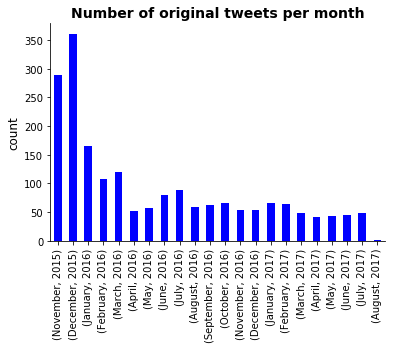

In [161]:
fig, ax = plt.subplots()
sns.set_style("white")
tweets_per_month.plot(kind='bar', color='b')
ax.set_title('Number of original tweets per month', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In which day of the week WeRateDogs posted most of its original tweets?


In [162]:
sort_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']

In [163]:
plotting_days = pd.DataFrame(twitter_archive_master.groupby('Day_of_Week')['tweet_id'].count())

In [164]:
plotting_days.reset_index(inplace=True)

In [165]:
plotting_days = plotting_days.rename(columns={'tweet_id': 'count'})

In [166]:
plotting_days['Day_of_Week'] = plotting_days.Day_of_Week.astype("category")

In [167]:
plotting_days.Day_of_Week.cat.set_categories(sort_of_days, inplace=True)

In [168]:
plotting_days = plotting_days.sort_values('Day_of_Week')

In [169]:
plotting_days

,Day_of_Week,count
1,Monday,321
5,Tuesday,292
6,Wednesday,292
4,Thursday,279
0,Friday,279
3,Sunday,253
2,Saturday,251


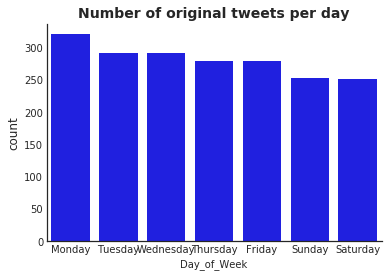

In [170]:
fig, ax = plt.subplots()
sns.set_style("white")
sns.barplot(x="Day_of_Week", y="count", data=plotting_days, color='b')
ax.set_title('Number of original tweets per day', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
plt.xticks(rotation='horizontal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

It seems that WeRateDogs was more active on Mondays and less active on Saturdays